# These are exercises from "All of Statistics" textbook

## Chapter 1: Probability

### Exercise 21
Suppose a coin has probability P of falling heads up. If we flip the coin many times, we would expect the proportion of heads to be near p. We will make this formal later. Take P = .3 and n = 1,000 and simulate n coin flips. Plot the proportion of heads as a function of n. Repeat for P = .03.

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
p = .3
n = 1000

def coin_flip(p=.3):
    """
    Returns 1 if heads or 0 if tails with p = p(head)
    """
    if np.random.randint(1,1000) <= p*1000:
        return 1
    else:
        return 0


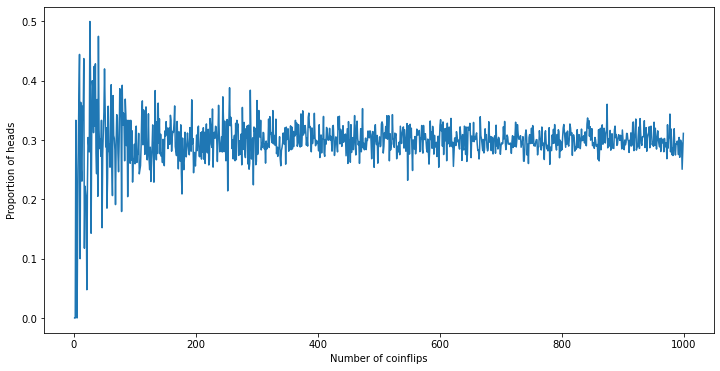

In [6]:
def simulate_coinflips(p=.3, n=1000):
    """
    Simulates n coinflips with p(head) = p and plots them
    """
    # Initialize variables
    outcomes = np.zeros(n-1)
    n_heads = 0
    
    
    # Loop conflips over different n
    for i in range(1, n):
        for j in range(1, i):
            n_heads = n_heads + coin_flip(p=p)
        
        outcomes[i-1] = (n_heads) / (i)
        n_heads = 0
    
    plt.figure(figsize=(12, 6))  # Width, Height in inches
    plt.plot(np.linspace(1,999,999), outcomes)
    plt.xlabel("Number of coinflips")
    plt.ylabel("Proportion of heads")
    
            

simulate_coinflips(p=p, n=n)

    

### Exercise 22 
Suppose we flip a coin n times and let P denote the probability of heads. Let X be the number of heads. We call X a binomial random variable, which is discussed in the next chapter. Intuition suggests that X will be close to n p. To see if this is true, we can repeat this experiment many times and average the X values. Carry out a simulation and compare the average of the X's to np. Try this for
p =.3 and n = 10, n = 100, and n = 1,000.

In [7]:
# Initialize variables
p = .5
n = 10

def compare_average(p=.3, n=1000):
    """Compares X with np"""
    
    # initialize variables
    n_heads = 0
    
    # Loop over n trials
    for i in range(n):
        n_heads = n_heads + coin_flip(p=p)
    return n_heads / (n*p)

print("For n=10, {}".format(compare_average(n=10)))
print("For n=100, {}".format(compare_average(n=100)))
print("For n=1000, {}".format(compare_average(n=1000)))
print("For n=10000, {}".format(compare_average(n=10000)))
print("For n=100000, {}".format(compare_average(n=100000)))


    

For n=10, 2.0
For n=100, 1.1666666666666667
For n=1000, 1.0066666666666666
For n=10000, 0.998
For n=100000, 1.0044666666666666


### Exercise 23

 Here we will get some experience simulating conditional probabilities. Consider tossing a fair die. Let A = {2, 4, 6} and B = {1, 2, 3, 4}. Then, P(A) = 1/2, P(B) = 2/3 and P(AB) = 1/3. Since P(AB) = P(A)P(B), the events A and B are independent. Simulate draws from the sample space and verify that $\hat{P}$(AB) = $\hat{P}$(A)$\hat{P}$(B) where $\hat{P}$(A) is the proportion of times A occurred in the simulation and similarly for $\hat{P}$(AB) and $\hat{P}$(B). Now find two events A and B that are not independent. Compute $\hat{P}$(A),$\hat{P}$(B) and $\hat{P}$(AB). Compare the calculated values to their theoretical values. Report your results and interpret

In [8]:
# We start by simulating a die roll
def roll_die():
    """Simulates a fair die"""
    return np.random.randint(1,7)

roll_die()

3

In [358]:
# Now we roll the die n times and check how often A, B and AB occur

n = 10000
A = [2, 4, 6]
B = [1, 2, 3, 4]


def check_ab(A, B, n=1000):
    """Checks if outcome of die roll is in A, B and AB events"""
    
    # Initialize
    A_success = 0
    B_success = 0
    AB_success = 0
    
    # Loop over n rolls
    for i in range(n):
        result = roll_die()
        A_success = A_success + int(result in A)
        B_success = B_success + int(result in B)
        AB_success = AB_success + int(result in A and result in B)
    
    # Print results
    print("Proportion of events in A: {}".format(A_success / n, ".4f"))
    print("Proportion of events in B: {}".format(B_success / n, ".4f"))
    print("Proportion of events in AB: {}".format(AB_success / n, ".4f"))

check_ab(A, B, n=n)


Proportion of events in A: 0.4998
Proportion of events in B: 0.6512
Proportion of events in AB: 0.3239


In [362]:
# Now let's do it for events that are mutually exclusive. For example, A is even and B is odd
n = 10000
A = [2, 4, 6]
B = [1, 3, 5]

check_ab(A, B, n=n)

Proportion of events in A: 0.4964
Proportion of events in B: 0.5036
Proportion of events in AB: 0.0


In [372]:
# Now let's do it for events that are not independent exclusive. For example, B is fully contained in A.
# We see they are not independent since p(A)*p(b) <> p(AB)
n = 10000
A = [2, 4, 6]
B = [2]

check_ab(A, B, n=n)

Proportion of events in A: 0.5007
Proportion of events in B: 0.1711
Proportion of events in AB: 0.1711
